In [3]:
from pysentimiento import create_analyzer
import  pandas as pd
analyzer = create_analyzer(task="sentiment", lang="es")

res=analyzer.predict("¿Quien su mayor competidor? Sobre todo si piensan en exportar")
df=pd.DataFrame(res.probas, index=['NEG', 'NEU', 'POS'])
df.drop_duplicates()


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


,NEG,NEU,POS
NEG,0.051265,0.844018,0.104717


In [4]:
from collections import defaultdict
import re
def preprocesing_content(content,show, dialoguesbygenshark):
    dialogues = defaultdict(list)

    # Pattern to match the speaker and text
    pattern = re.compile(r"\[(.*?)\]\n(.+?)(?=\[|$)", re.DOTALL)

    # Find all matches
    matches = pattern.findall(content)

    if dialoguesbygenshark==False:

        for speaker, content in matches:
        # Extract the relevant part of the speaker identifier (e.g., 'shark' from 'shark 6')
            speaker_type = re.match(r'(shark|sharkM|sharkH|entrepreneurM|entrepreneurH|Alejandra Ríos - Woman|Alejandra Ríos - Female|Karla Berman - Woman|Karla Berman - Female|Amaury Vergara - Man|Amaury Vergara - Male|Marcus Dantus - Man|Marcus Dantus - Male|Marisa Lazo - Woman|Marisa Lazo - Female|Brian Requarth - Man|Brian Requarth - Male|Alejandro Litchi - Man|Alejandro Litchi - Male|Adriana Gallardo - Female|Adriana Gallardo - Woman|Oso Trava - Man|Oso Trava - Male|Speaker 1 - Woman|Speaker 1 - Female|Speaker 2 - Woman|Speaker 2 - Female|Speaker 3 - Woman|Speaker 3 - Female|Speaker 1 - Man|Speaker 1 - Male|Speaker 2 - Man|Speaker 2 - Male|Speaker 3 - Man|Speaker 3 - Male)', speaker)
            if speaker_type:
                dialogues[speaker_type.group()].append(content.strip())

        #  text separated in the dialogues dictionary
        shark_dialogues = dialogues['shark'] + dialogues['sharkM'] + dialogues['sharkH'] + dialogues['Alejandra Ríos - Woman'] + dialogues['Alejandra Ríos - Female'] + dialogues['Karla Berman - Woman'] + dialogues['Karla Berman - Female'] + dialogues['Amaury Vergara - Man'] + dialogues['Amaury Vergara - Male']+ dialogues['Marcus Dantus - Man']+ dialogues['Marcus Dantus - Male']+ dialogues['Marisa Lazo - Woman']+ dialogues['Marisa Lazo - Female']+ dialogues['Adriana Gallardo - Woman']+ dialogues['Adriana Gallardo - Female']+ dialogues['Oso Trava - Man']+ dialogues['Oso Trava - Male']+dialogues['Alejandro Litchi - Man']+ dialogues['Alejandro Litchi - Male']+dialogues['Brian Requarth - Man']+ dialogues['Brian Requarth - Male']
        entrepreneur_dialogues = dialogues['entrepreneurM'] + dialogues['entrepreneurH']+dialogues['Speaker 1 - Woman'] + dialogues['Speaker 2 - Woman'] + dialogues['Speaker 1 - Man'] + dialogues['Speaker 2 - Man']+dialogues['Speaker 1 - Female'] + dialogues['Speaker 2 - Female']+ dialogues['Speaker 3 - Female'] + dialogues['Speaker 1 - Male'] + dialogues['Speaker 2 - Male']+ dialogues['Speaker 3 - Male']




        if show==True:

            print("Shark dialogues:")
            print("\n".join(shark_dialogues))

            print("\nEntrepreneur dialogues:")
            print("\n".join(entrepreneur_dialogues))

        # Pate as paragraph
        shark_paragraph = " ".join(shark_dialogues)
        entrepreneur_paragraph = " ".join(entrepreneur_dialogues)

        cleaned_text = re.sub(r'[\r\n]', ' ', shark_paragraph)  # Replace line breaks with space

        # Split the cleaned text into sentences or phrases based on key questions and answers
        topics = re.split(r'\s+', cleaned_text)

        # Filter out empty strings and short words that are not topics
        topics = [word for word in topics if len(word) > 3]

        topics=[word for word in topics if word not in ["would","something",'think',
                                                "peso",'pesos','million','thing' ,'business','company',
                                                'going','really','marcos','Nicolás','Juan','thank','deal',
                                                'ángel','daniel','alexei','coffee','nicolás','adolfo','lichi',
                                                'offer','cream','cereal','osama','truck','marcos',
                                                'mauri','Amaury'
                                                ]]

        # Convert the list of topics back to a string
        topics_str = ' '.join(topics)

        return topics_str
    if dialoguesbygenshark==True:
         # Clean and separate the dialogues
        for speaker, content in matches:
            # Extract the relevant part of the speaker identifier (e.g., 'shark' from 'shark 6')
            speaker_type = re.match(r'(sharkM|sharkH|entrepreneurM|entrepreneurH|Alejandra Ríos - Woman|Alejandra Ríos - Female|Karla Berman - Woman|Karla Berman - Female|Amaury Vergara - Man|Amaury Vergara - Male|Marcus Dantus - Man|Marcus Dantus - Male|Marisa Lazo - Woman|Marisa Lazo - Female|Brian Requarth - Man|Brian Requarth - Male|Alejandro Litchi - Man|Alejandro Litchi - Male|Adriana Gallardo - Female|Adriana Gallardo - Woman|Oso Trava - Man|Oso Trava - Male|Speaker 1 - Woman|Speaker 1 - Female|Speaker 2 - Woman|Speaker 2 - Female|Speaker 3 - Woman|Speaker 3 - Female|Speaker 1 - Man|Speaker 1 - Male|Speaker 2 - Man|Speaker 2 - Male|Speaker 3 - Man|Speaker 3 - Male)', speaker)
            if speaker_type:
                dialogues[speaker_type.group()].append(content.strip())
        #  text separated in the dialogues dictionary
        shark_dialogues_M =  dialogues['sharkM'] + dialogues['Alejandra Ríos - Woman'] + dialogues['Alejandra Ríos - Female'] + dialogues['Karla Berman - Woman']+dialogues['Karla Berman - Female']+ dialogues['Marisa Lazo - Woman']+ dialogues['Marisa Lazo - Female']+ dialogues['Adriana Gallardo - Woman']+ dialogues['Adriana Gallardo - Female']
        shark_dialogues_H = dialogues['sharkH'] + dialogues['Amaury Vergara - Man'] + dialogues['Amaury Vergara - Male']+ dialogues['Marcus Dantus - Man']+ dialogues['Marcus Dantus - Male']+dialogues['Oso Trava - Man']+ dialogues['Oso Trava - Male']+dialogues['Alejandro Litchi - Man']+ dialogues['Alejandro Litchi - Male']+dialogues['Brian Requarth - Man']+ dialogues['Brian Requarth - Male']




        if show==True:

            print("Shark dialogues women:")
            print("\n".join(shark_dialogues_M))

            print("\nShark dialogues men:")
            print("\n".join(shark_dialogues_H))

        # Pate as paragraph
        shark_paragraph_M = " ".join(shark_dialogues_M)
        shark_paragraph_H = " ".join(shark_dialogues_H)


        cleaned_text_M = re.sub(r'[\r\n]', ' ', shark_paragraph_M )  # Replace line breaks with space
        cleaned_text_H = re.sub(r'[\r\n]', ' ', shark_paragraph_H )  # Replace line breaks with space

        # Split the cleaned text into sentences or phrases based on key questions and answers
        topicsM = re.split(r'\s+', cleaned_text_M)
        topicsH = re.split(r'\s+', cleaned_text_H)
        # Filter out empty strings and short words that are not topics
        topicsH = [word for word in topicsH if len(word) > 3]
        topicsM = [word for word in topicsM if len(word) > 3]

        topicsH=[word for word in topicsH if word not in ["would","something",'think',
                                                "peso",'pesos','million','thing' ,'business','company',
                                                'going','really','marcos','Nicolás','Juan','thank','deal',
                                                'ángel','daniel','alexei','coffee','nicolás','adolfo','lichi',
                                                'offer','cream','cereal','osama','truck','marcos',
                                                'mauri'
                                                ]]
        topicsH=[word for word in topicsM if word not in ["would","something",'think',
                                                "peso",'pesos','million','thing' ,'business','company',
                                                'going','really','marcos','Nicolás','Juan','thank','deal',
                                                'ángel','daniel','alexei','coffee','nicolás','adolfo','lichi',
                                                'offer','cream','cereal','osama','truck','marcos',
                                                'mauri'
                                                ]]

        # Convert the list of topics back to a string
        topics_str_H = ' '.join(topicsH)
        topics_str_M = ' '.join(topicsM)
        return topics_str_H, topics_str_M

In [9]:
import os
import random
import re
from collections import defaultdict
#shark tank chapter/transcripciones_ingles/Capitulo2pitch1.txt
#https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21
text_data_all_h = []
text_data_all_m = []

entrepreneurs = []
sharks = []

total_files_H = []
total_files_M = []


df_full_h=pd.DataFrame()
df_full_m=pd.DataFrame()
df_full_b=pd.DataFrame()

dir1='/Users/delia.cardenas/Documents/estancia_investigacion/shark tank chapter/transcripciones_ingles'
dir2='/Users/delia.cardenas/Documents/estancia_investigacion/shark tank chapter/Transcripciones_Cap_11_20_Temp8_Daan'

files_dir1 = os.listdir(dir1)
files_dir2 = os.listdir(dir2)

# Combinar las listas de archivos de ambos directorios
all_files = files_dir1 + files_dir2

#if epis[j-1][3:4]=="H":
for filename in all_files:

    if filename.endswith('.txt'):

        if filename in files_dir1:
            file_path = os.path.join(dir1, filename)
        else:
            file_path = os.path.join(dir2, filename)


        with open(file_path, 'r', encoding='utf-8') as f:
            # Filename tiene errores
            if (filename[16:17]=="H") | (filename[0:3]=="Men"):
                #print(filename)
                
                total_files_H.append(filename)
                content = f.read()
                #new code
                content = content.replace('coffee', 'product')
                content = content.replace('products', 'product')
             
               
                
                content = re.sub(r'\d+', '', content)
                print(filename)
                topics_str=preprocesing_content(content,show=False,dialoguesbygenshark=False)
                analyzer = create_analyzer(task="sentiment", lang="es")

                res=analyzer.predict(topics_str)
                compound_df=pd.DataFrame(res.probas, index=['NEG', 'NEU', 'POS'])
                compound_df=compound_df.drop_duplicates()
                compound_df['id_epis']=filename
                df_full_h=pd.concat([df_full_h,compound_df])


            elif ((filename[0:5]=="Women")  | (filename[16:17]=="M") ):
                total_files_M.append(filename)
                content = f.read()
                #new code
                content = content.replace('coffee', 'product')
                content = content.replace('pesos', '')
                content = content.replace('natalia', '')
                content = content.replace('Natalia', '')
                content = content.replace('artisans', 'employees')
                content = content.replace('products', 'product')
                 

                content = re.sub(r'\d+', '', content)
                print(filename)
                topics_str_w=preprocesing_content(content,show=False,dialoguesbygenshark=False)
                analyzer = create_analyzer(task="sentiment", lang="es")

                res=analyzer.predict(topics_str_w)
                compound_df=pd.DataFrame(res.probas, index=['NEG', 'NEU', 'POS'])
                compound_df=compound_df.drop_duplicates()
                compound_df['id_epis']=filename
                df_full_m=pd.concat([df_full_m,compound_df])

            else:
                
                content = f.read()
                #new code
                content = content.replace('coffee', 'product')
                content = content.replace('pesos', '')
                content = content.replace('natalia', '')
                content = content.replace('Natalia', '')
                content = content.replace('artisans', 'employees')
                content = content.replace('products', 'product')
                 

                content = re.sub(r'\d+', '', content)
                print(filename)
                topics_str_w=preprocesing_content(content,show=False,dialoguesbygenshark=False)
                analyzer = create_analyzer(task="sentiment", lang="es")

                res=analyzer.predict(topics_str_w)
                compound_df=pd.DataFrame(res.probas, index=['NEG', 'NEU', 'POS'])
                compound_df=compound_df.drop_duplicates()
                compound_df['id_epis']=filename
                df_full_b=pd.concat([df_full_b,compound_df])
                


Capitulo2pitch4_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo7pitch4_M_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo1pitch1_B_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo3pitch3_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo5pitch2_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo1pitch3_M_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo8pitch1_B_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo5pitch3_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo7pitch1_B_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo10pitc2_M_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo4pitch4_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo3pitch4_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo2pitch3_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo9pitch1_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo6pitch1_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo4pitch3_B_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo4pitch2_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo8pitch3_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo3pitch1_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo10pitc4_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo9pitch4_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo10pitc1_M_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo6pitch4_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo7pitch2_B_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo3pitch2_M_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo4pitch1_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo1pitch2_B_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo8pitch2_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo5pitch4_M_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo2pitch2_M_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo5pitch1_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo7pitch3_B_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo2pitch1_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo9pitch3_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo9pitch2_B_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo10pitc3_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo8pitch4_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo6pitch3_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo6pitch2_B_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter15_Pitch4_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter16_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Women_Chapter14_Picth4_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Women_Chapter11_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter12_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter11_Pitch4_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Women_Chapter13_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter14_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter14_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter20_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter17_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Women_Chapter19_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter13_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter12_Pictch4_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Women_Chapter12_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter18_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter18_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter15_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter11_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter19_Pitch4_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter14_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter17_Pitch4_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter13_Pitch4_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter16_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter16_Pitch4_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Women_Chapter20_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter15_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter18_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter17_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Women_Chapter13_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter19_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter18_Pitch4_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter16_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Women_Chapter15_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter19_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter20_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter17_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter11_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Women_Chapter12_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [15]:
df_full=pd.concat([df_full_m,df_full_h,df_full_b])

In [31]:
print(df_full_m['NEG'].mean())
print(df_full_h['NEG'].mean())
print(df_full_b['NEG'].mean())

0.32349747885018587
0.29947709266182987
0.44670003103582484


In [27]:
df_full['Episode Number'] = df_full['id_epis'].str.extract(r'(?:Capitulo|Chapter)(\d+)', expand=False)
df_full['Pitch Number'] = df_full['id_epis'].str.extract(r'(?:pitch|Pitch|pitc|Picth|Pictch)(\d+)', expand=False)
df_full[['Episode Number',
 'Pitch Number','NEG','NEU',	'POS']].to_csv('data/pysentiment_chapter.csv',index=False)



In [ ]:
# get pysentiment but cleanning im out of th text 

In [32]:
import os
import random
import re
from collections import defaultdict
#shark tank chapter/transcripciones_ingles/Capitulo2pitch1.txt
#https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21
text_data_all_h = []
text_data_all_m = []

entrepreneurs = []
sharks = []

total_files_H = []
total_files_M = []


df_full_h=pd.DataFrame()
df_full_m=pd.DataFrame()
df_full_b=pd.DataFrame()

dir1='/Users/delia.cardenas/Documents/estancia_investigacion/shark tank chapter/transcripciones_ingles'
dir2='/Users/delia.cardenas/Documents/estancia_investigacion/shark tank chapter/Transcripciones_Cap_11_20_Temp8_Daan'

files_dir1 = os.listdir(dir1)
files_dir2 = os.listdir(dir2)

# Combinar las listas de archivos de ambos directorios
all_files = files_dir1 + files_dir2

#if epis[j-1][3:4]=="H":
for filename in all_files:

    if filename.endswith('.txt'):

        if filename in files_dir1:
            file_path = os.path.join(dir1, filename)
        else:
            file_path = os.path.join(dir2, filename)


        with open(file_path, 'r', encoding='utf-8') as f:
            # Filename tiene errores
            if (filename[16:17]=="H") | (filename[0:3]=="Men"):
                #print(filename)
                
                total_files_H.append(filename)
                content = f.read()
                #new code
                content = content.replace('coffee', 'product')
                content = content.replace('products', 'product')
             
               
                
                content = re.sub(r'\d+', '', content)
                print(filename)
                topics_str=preprocesing_content(content,show=False,dialoguesbygenshark=False)
                topics_str = re.sub(r'\b(i am out|I am out|out)\b', '', topics_str, flags=re.IGNORECASE)

                analyzer = create_analyzer(task="sentiment", lang="es")

                res=analyzer.predict(topics_str)
                compound_df=pd.DataFrame(res.probas, index=['NEG', 'NEU', 'POS'])
                compound_df=compound_df.drop_duplicates()
                compound_df['id_epis']=filename
                df_full_h=pd.concat([df_full_h,compound_df])


            elif ((filename[0:5]=="Women")  | (filename[16:17]=="M") ):
                total_files_M.append(filename)
                content = f.read()
                #new code
                content = content.replace('coffee', 'product')
                content = content.replace('pesos', '')
                content = content.replace('natalia', '')
                content = content.replace('Natalia', '')
                content = content.replace('artisans', 'employees')
                content = content.replace('products', 'product')
                 

                content = re.sub(r'\d+', '', content)
                print(filename)
                topics_str_w=preprocesing_content(content,show=False,dialoguesbygenshark=False)
                topics_str_w = re.sub(r'\b(i am out|I am out|out)\b', '', topics_str_w, flags=re.IGNORECASE)

                analyzer = create_analyzer(task="sentiment", lang="es")

                res=analyzer.predict(topics_str_w)
                compound_df=pd.DataFrame(res.probas, index=['NEG', 'NEU', 'POS'])
                compound_df=compound_df.drop_duplicates()
                compound_df['id_epis']=filename
                df_full_m=pd.concat([df_full_m,compound_df])

            else:
                
                content = f.read()
                #new code
                content = content.replace('coffee', 'product')
                content = content.replace('pesos', '')
                content = content.replace('natalia', '')
                content = content.replace('Natalia', '')
                content = content.replace('artisans', 'employees')
                content = content.replace('products', 'product')
                 

                content = re.sub(r'\d+', '', content)
                print(filename)
                topics_str_w=preprocesing_content(content,show=False,dialoguesbygenshark=False)
                topics_str_w = re.sub(r'\b(i am out|I am out|out)\b', '', topics_str_w, flags=re.IGNORECASE)

                analyzer = create_analyzer(task="sentiment", lang="es")

                res=analyzer.predict(topics_str_w)
                compound_df=pd.DataFrame(res.probas, index=['NEG', 'NEU', 'POS'])
                compound_df=compound_df.drop_duplicates()
                compound_df['id_epis']=filename
                df_full_b=pd.concat([df_full_b,compound_df])
                

Capitulo2pitch4_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo7pitch4_M_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo1pitch1_B_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo3pitch3_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo5pitch2_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo1pitch3_M_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo8pitch1_B_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo5pitch3_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo7pitch1_B_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo10pitc2_M_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo4pitch4_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo3pitch4_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo2pitch3_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo9pitch1_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo6pitch1_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo4pitch3_B_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo4pitch2_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo8pitch3_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo3pitch1_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo10pitc4_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo9pitch4_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo10pitc1_M_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo6pitch4_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo7pitch2_B_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo3pitch2_M_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo4pitch1_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo1pitch2_B_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo8pitch2_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo5pitch4_M_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo2pitch2_M_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo5pitch1_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo7pitch3_B_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo2pitch1_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo9pitch3_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo9pitch2_B_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo10pitc3_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo8pitch4_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo6pitch3_H_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Capitulo6pitch2_B_lab.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter15_Pitch4_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter16_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Women_Chapter14_Picth4_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Women_Chapter11_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter12_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter11_Pitch4_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Women_Chapter13_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter14_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter14_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter20_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter17_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Women_Chapter19_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter13_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter12_Pictch4_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Women_Chapter12_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter18_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter18_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter15_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter11_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter19_Pitch4_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter14_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter17_Pitch4_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter13_Pitch4_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter16_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter16_Pitch4_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Women_Chapter20_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter15_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter18_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter17_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Women_Chapter13_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter19_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter18_Pitch4_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter16_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Women_Chapter15_Pitch2_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter19_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter20_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Mixed_Chapter17_Pitch1_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Men_Chapter11_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Women_Chapter12_Pitch3_Season8.txt


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [34]:
df_full['Episode Number'] = df_full['id_epis'].str.extract(r'(?:Capitulo|Chapter)(\d+)', expand=False)
df_full['Pitch Number'] = df_full['id_epis'].str.extract(r'(?:pitch|Pitch|pitc|Picth|Pictch)(\d+)', expand=False)
df_full[['Episode Number',
 'Pitch Number','NEG','NEU',	'POS']].to_csv('data/pysentiment_chapter_clean.csv',index=False)


In [33]:
print(df_full_m['NEG'].mean())
print(df_full_h['NEG'].mean())
print(df_full_b['NEG'].mean())

0.3156106534297578
0.2968913269943969
0.4427286649220868


In [29]:
topics_str_w

'Excellent. it\'s your turn. Brian\'s Come you\'re missing one, you\'re missing one. this color. Okay, understand now. much does intellectual property protection cost? These you\'re asking for, that, have other plans that money? What you\'re doing super important However, lost aspect. don\'t that have clarity about need money, don\'t that have clear path what need grow your business. think, mission incredible. believe person carry out. that\'s out. It\'s like memory game. more missing. Sofía. Hello. many countries want expand next year, example? sell product? What your sales channel? Sofía, tell something. what\'s happening all. genuinely want help, you\'re still having trouble understanding, within range things focus your energy attention thing. second chance because believe presented today most appropriate. those reasons, out, that reach let\'s months, hopefully that time, show that have that ability listen, that tell again you\'re doing, what you\'ve done months, that willing, then 

In [ ]:
   content cleanning from 

In [3]:
pd.DataFrame(res.probas, index=['NEG', 'NEU', 'POS'])

,NEG,NEU,POS
NEG,0.051265,0.844018,0.104717
NEU,0.051265,0.844018,0.104717
POS,0.051265,0.844018,0.104717


In [4]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd

#%% Usando Vader con .txt en español
#En esta lista dice si son hombres o mujeres



import os
directory = 'Mex Shark/'

# List all files with .txt extension
epis = [f for f in os.listdir(directory) if f.endswith('.txt')]

print(epis)

import os

# Specify the directory


#Se declaran listas vacías para más adelante agregarles el compound
lshombres=[]
lsmujeres=[]

df_full_h=pd.DataFrame()
df_full_m=pd.DataFrame()
#Se declara una función para limpiar el texto (no es necesaria, el resultado es el mismo con o sin la función).
#La vi en internet y pensé que podría ser útil más adelante.
def preprocess(ReviewText):
    ReviewText = ReviewText.replace('\t', ' ')
    ReviewText = ReviewText.replace('\r', ' ')
    ReviewText = ReviewText.replace('\n', ' ')
    return (ReviewText) 

#Se hace un ciclo para analizar cada uno de los episodios con Vader (aunque no estoy seguro si vader funciona en español)
for i in epis:
    
    #Esta parte es para leer cada archivo
    dir = "Mex Shark/"+str(i)
    with open(dir, 'r') as file:
        contents = file.read()
    #Esta es la función que se declaró atrás
    contents = preprocess(contents)
    
  
    analyzer = create_analyzer(task="sentiment", lang="es")

    res=analyzer.predict(contents)
    compound_df=pd.DataFrame(res.probas, index=['NEG', 'NEU', 'POS'])
    compound_df=compound_df.drop_duplicates()
    compound_df['id_epis']=i
    #Esta parte es para poner en una lista separada el compound, va en lsmujeres si el pitch lo hizo una mujer
    #va en lshombres si el pitch lo hizo un hombre
  
    j=epis.index(i)
    if epis[j-1][3:4]=="H":
       
        df_full_h=pd.concat([df_full_h,compound_df])
    elif epis[j-1][3:4]=="M":
        df_full_m=pd.concat([df_full_m,compound_df])
    else:
    
        df_full_mix=pd.concat([df_full_m,compound_df])





[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/delia.cardenas/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


['807HN_H.txt', '827HP_A.txt', '826MP_H.txt', '820MN_A.txt', '823HP_H.txt', '818HP_A.txt', '819MP_H.txt', '809HP_A.txt', '822HP_H.txt', '805MP_A.txt', '816HN_H.txt', '806HN_H.txt', '808MN_H.txt', '810HN_A.txt', '812HP_A.txt', '804HN_H.txt', '814HN_H.txt', '803MP_H.txt', '801HN_A.txt', '817HP_H.txt', '811HN_A.txt', '815HN_H.txt', '828HP_H.txt', '813HP_A.txt', '802MP_H.txt', '824MP_H.txt', '825HP_A.txt', '821HP_H.txt', '808MN_A.txt', '810HN_H.txt', '814HN_A.txt', '804HN_A.txt', '812HP_H.txt', '803MP_A.txt', '811HN_H.txt', '817HP_A.txt', '801HN_H.txt', '813HP_H.txt', '828HP_A.txt', '815HN_A.txt', '802MP_A.txt', '824MP_A.txt', '825HP_H.txt', '821HP_A.txt', '807HN_A.txt', '827HP_H.txt', '820MN_H.txt', '826MP_A.txt', '818HP_H.txt', '823HP_A.txt', '819MP_A.txt', '822HP_A.txt', '809HP_H.txt', '805MP_H.txt', '806HN_A.txt', '816HN_A.txt']


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spa

nan
nan


/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [10]:


media_h = np.mean( df_full_h['NEG'])
media_m = np.mean( df_full_m['NEG'])
print(media_h)
print(media_m)

0.46800206853076814
0.46057450503576547


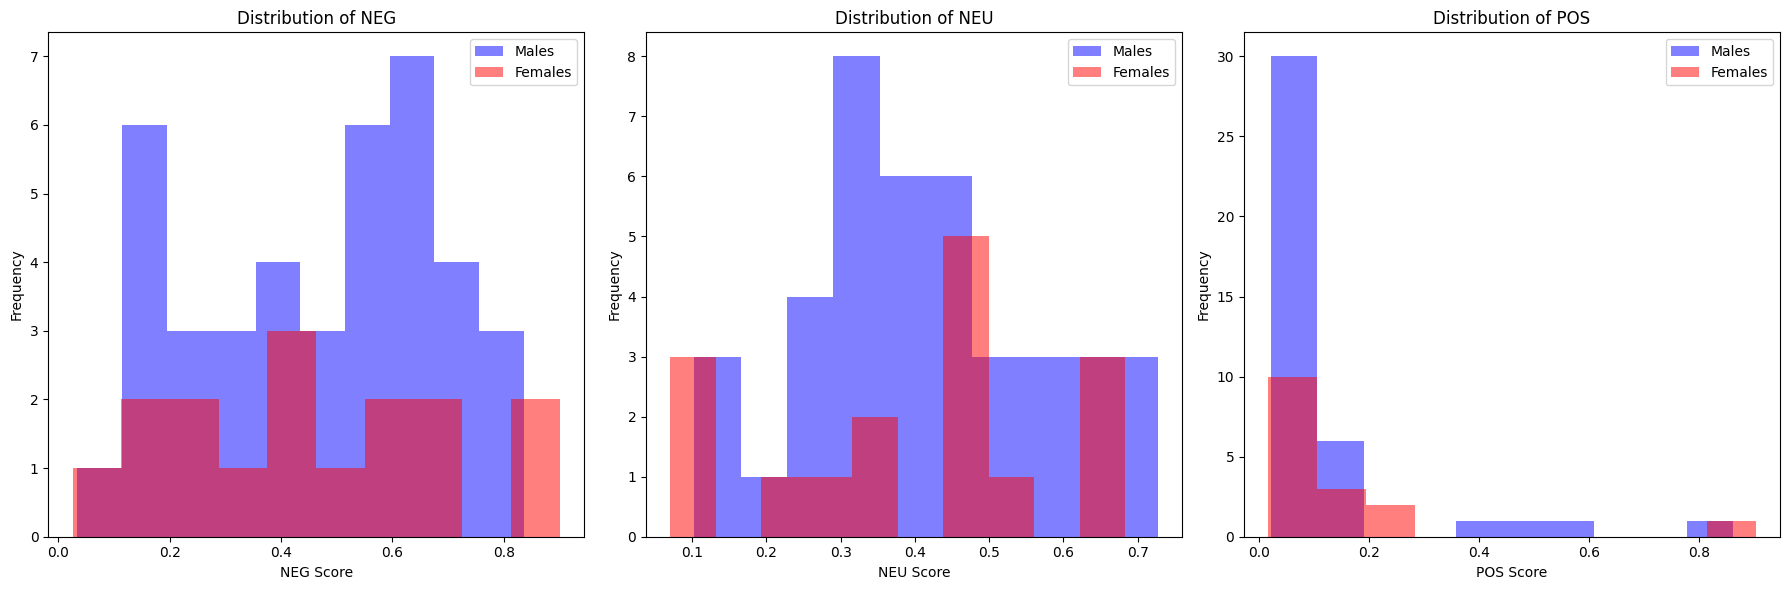

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

# Plotting NEG distribution
plt.subplot(1, 3, 1)
plt.hist(df_full_h['NEG'], bins=10, color='blue', alpha=0.5, label='Males')
plt.hist(df_full_m['NEG'], bins=10, color='red', alpha=0.5, label='Females')
plt.title('Distribution of NEG')
plt.xlabel('NEG Score')
plt.ylabel('Frequency')
plt.legend()

# Plotting NEU distribution
plt.subplot(1, 3, 2)
plt.hist(df_full_h['NEU'], bins=10, color='blue', alpha=0.5, label='Males')
plt.hist(df_full_m['NEU'], bins=10, color='red', alpha=0.5, label='Females')
plt.title('Distribution of NEU')
plt.xlabel('NEU Score')
plt.ylabel('Frequency')
plt.legend()

# Plotting POS distribution
plt.subplot(1, 3, 3)
plt.hist(df_full_h['POS'], bins=10, color='blue', alpha=0.5, label='Males')
plt.hist(df_full_m['POS'], bins=10, color='red', alpha=0.5, label='Females')
plt.title('Distribution of POS')
plt.xlabel('POS Score')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
from scipy.stats import ks_2samp

# Kolmogorov-Smirnov Test for NEG
ks_neg = ks_2samp(df_full_h['NEG'], df_full_m['NEG'])
print('KS Test for NEG:', ks_neg)

# Kolmogorov-Smirnov Test for NEU
ks_neu = ks_2samp(df_full_h['NEU'], df_full_m['NEU'])
print('KS Test for NEU:', ks_neu)

# Kolmogorov-Smirnov Test for POS
ks_pos = ks_2samp(df_full_h['POS'], df_full_m['POS'])
print('KS Test for POS:', ks_pos)


KS Test for NEG: KstestResult(statistic=0.15, pvalue=0.9340280012536439, statistic_location=0.5054057240486145, statistic_sign=-1)
KS Test for NEU: KstestResult(statistic=0.2125, pvalue=0.6219495588685426, statistic_location=0.4386694133281708, statistic_sign=1)
KS Test for POS: KstestResult(statistic=0.2, pvalue=0.6966599747310563, statistic_location=0.07254717499017715, statistic_sign=1)


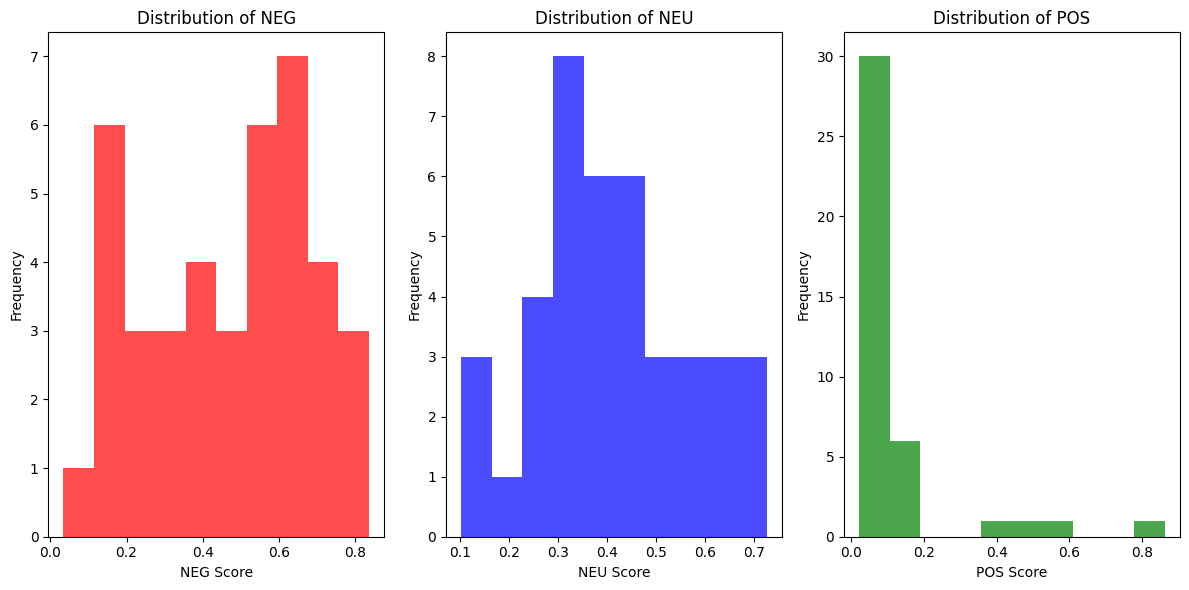

In [48]:


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotting NEG distribution
plt.subplot(1, 3, 1)
plt.hist(df_full_h['NEG'], bins=10, color='red', alpha=0.7)
plt.title('Distribution of NEG')
plt.xlabel('NEG Score')
plt.ylabel('Frequency')

# Plotting NEU distribution
plt.subplot(1, 3, 2)
plt.hist(df_full_h['NEU'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution of NEU')
plt.xlabel('NEU Score')
plt.ylabel('Frequency')

# Plotting POS distribution
plt.subplot(1, 3, 3)
plt.hist(df_full_h['POS'], bins=10, color='green', alpha=0.7)
plt.title('Distribution of POS')
plt.xlabel('POS Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

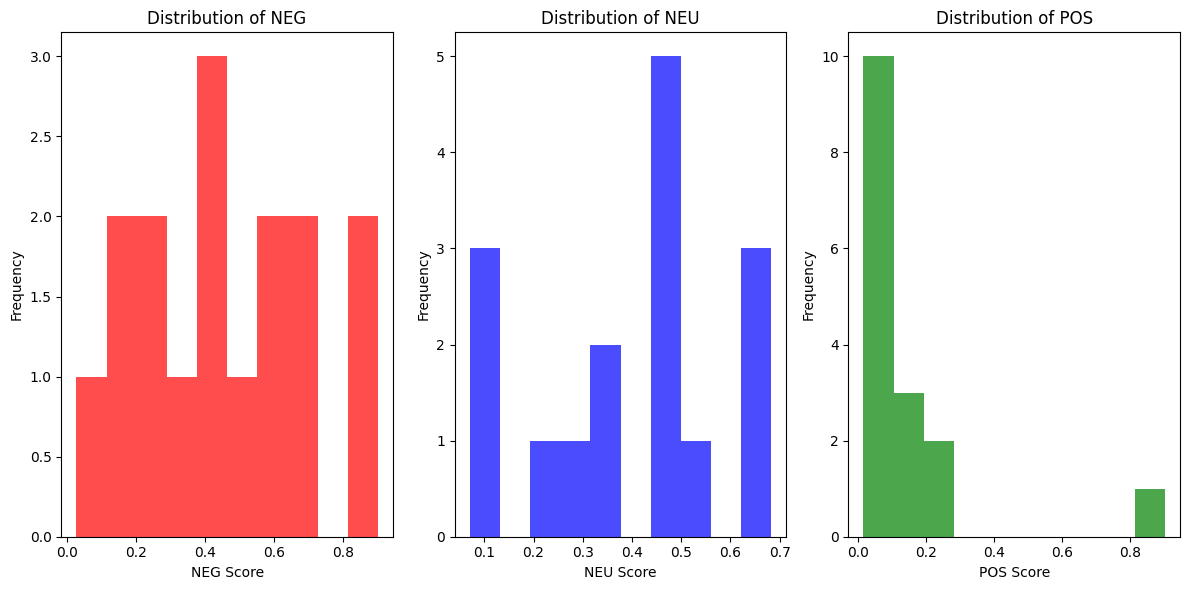

In [49]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotting NEG distribution
plt.subplot(1, 3, 1)
plt.hist(df_full_h['NEG'], bins=10, color='red', alpha=0.7)
plt.title('Distribution of NEG')
plt.xlabel('NEG Score')
plt.ylabel('Frequency')

# Plotting NEU distribution
plt.subplot(1, 3, 2)
plt.hist(df_full_h['NEU'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution of NEU')
plt.xlabel('NEU Score')
plt.ylabel('Frequency')

# Plotting POS distribution
plt.subplot(1, 3, 3)
plt.hist(df_full_h['POS'], bins=10, color='green', alpha=0.7)
plt.title('Distribution of POS')
plt.xlabel('POS Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotting NEG distribution
plt.subplot(1, 3, 1)
plt.hist(df_full_m['NEG'], bins=10, color='red', alpha=0.7)
plt.title('Distribution of NEG')
plt.xlabel('NEG Score')
plt.ylabel('Frequency')

# Plotting NEU distribution
plt.subplot(1, 3, 2)
plt.hist(df_full_m['NEU'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution of NEU')
plt.xlabel('NEU Score')
plt.ylabel('Frequency')

# Plotting POS distribution
plt.subplot(1, 3, 3)
plt.hist(df_full_m['POS'], bins=10, color='green', alpha=0.7)
plt.title('Distribution of POS')
plt.xlabel('POS Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [24]:
media_h

nan

In [5]:
from gliner import GLiNER

model = GLiNER.from_pretrained("urchade/gliner_multi")

text = """
[Orador 3]
¿Cuánto cuesta el producto? Este mole cuesta hacerlo 85 pesos. ¿Y en cuánto lo venden?

[Orador 6]
200 pesos. ¿Tienes su mayor competidor? Sobre todo si piensan en exportar.


[Orador 5]
¿Por qué va la empresa en este precio?


"""
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("model_name")
labels = ["preguntas", "respuestas"]

entities = model.predict_entities(text, labels)

for entity in entities:
    print(entity["text"], "=>", entity["label"])

Fetching 4 files: 100%|██████████| 4/4 [00:00<00:00, 42581.77it/s]


ValueError: Couldn't instantiate the backend tokenizer from one of: 
(1) a `tokenizers` library serialization file, 
(2) a slow tokenizer instance to convert or 
(3) an equivalent slow tokenizer class to instantiate and convert. 
You need to have sentencepiece installed to convert a slow tokenizer to a fast one.

In [6]:
from transformers import pipeline


classifier = pipeline('sentiment-analysis', 
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

sentences = ["¡Me encantan los artículos de Medium, son lo máximo!", 
                "Odio los lunes, no sirven para nada.", 
                "El libro es medio bueno; me gustaron algunos personajes."]

results = classifier(sentences)
for result in results:
    print(f"polaridad: {result['label']}, score: {round(result['score'], 4)}")

/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


polaridad: 5 stars, score: 0.9102
polaridad: 1 star, score: 0.9125
polaridad: 3 stars, score: 0.7746
